In [1]:
import numpy as np
import matplotlib.pyplot as plt
import impyute.imputation.ts as ts
#import data_create_tool as dct
import pandas as pd
import gzip
import pickle
from tqdm import tqdm_notebook
from pyts.image import RecurrencePlot
from pyts.datasets import load_gunpoint

In [2]:
with gzip.open("./dataset/train_set_fin.pickle",'rb') as f:
    data2 = pickle.load(f)

In [3]:
def load_area_split(df =None):
        data = df
        data = data.sort_values(['AREA_INDEX', 'TIME_INDEX'])
        data.index = range(data['AREA_INDEX'].size)
        area = data['AREA_INDEX']
        index = area[~area.duplicated(keep='first')].index
        area = area.drop_duplicates()
        #area = area.astype('int64')
        area = area.to_numpy()
        result=dict()
        for idx in range(index.size - 1):
            result[area[idx]] = data.loc[index[idx]: index[idx + 1] - 1]
        result[area[area.size - 1]] = data.loc[index[index.size - 1]: data['AREA_INDEX'].size - 1]
        return result

In [4]:
data = load_area_split(data)

In [5]:
for area  in data.keys():
    data[area] = data[area][['RAIN','SO2','NO2','NO','NOX','O3','CO','PM10','PM25']].to_numpy()

In [25]:

sample = data[111121][0][1]
sample = np.array(sample)
for idx in range(1,len(data[111121])):
    sample = np.append(sample,data[111121][idx][1])

In [20]:
len(sample)

15360

In [30]:
sample = sample.reshape(-1,1)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(sample)
test = scaler.transform(sample)

In [137]:
test

array([[-0.07370889],
       [-0.07370889],
       [-0.07370889],
       ...,
       [-0.07370893],
       [-0.07370893],
       [-0.07370892]])

In [131]:
def recurrence_plot(data,t_hold='point',percent = 50,w_size =24):
    rp = RecurrencePlot(threshold=t_hold, percentage=percent)
    X = data.reshape(-1,w_size)
    X_rp = rp.fit_transform(X)
    return X_rp


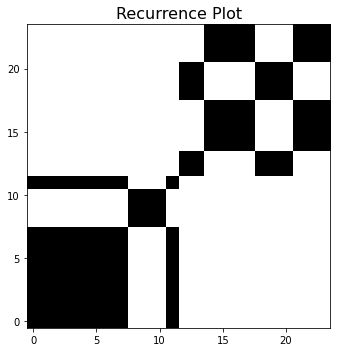

In [135]:
# rp = RecurrencePlot(threshold='point', percentage=50)
# X = sample.reshape(-1,24)
# X_rp = rp.fit_transform(X)

X_rp = recurrence_plot(data=sample,t_hold='point',percent = 50,w_size =24)

# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot', fontsize=16)
plt.tight_layout()
plt.show()

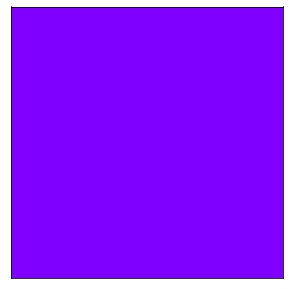

In [265]:
from pyts.image import MarkovTransitionField
from pyts.datasets import load_gunpoint

# a=test.reshape(-1,128)
X = test_data.reshape(5,-1)
# MTF transformation
# print(len(X))
# mtf = MarkovTransitionField(image_size=5,strategy='uniform')
# X_mtf = mtf.fit_transform(X)


# Show the image for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(test_data[:5], cmap='rainbow', origin='lower')
# plt.title('Markov Transition Field', fontsize=18)
# plt.colorbar(fraction=0.0457, pad=0.04)
# plt.tight_layout()
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
fig = plt.gcf()
fig.savefig('myfile.png', dpi=fig.dpi)
plt.show()

In [261]:
X_mtf[0]

array([[0.92307692, 0.92307692, 0.92307692, 0.64102564, 0.92307692],
       [0.92307692, 0.92307692, 0.92307692, 0.64102564, 0.92307692],
       [0.92307692, 0.92307692, 0.92307692, 0.64102564, 0.92307692],
       [0.94871795, 0.94871795, 0.94871795, 0.64957265, 0.94871795],
       [0.92307692, 0.92307692, 0.92307692, 0.64102564, 0.92307692]])

In [255]:
test_data.reshape(5,-1)

array([[0.    , 0.    , 0.    , 0.    , 0.0001, 0.    , 0.    , 0.    ,
        0.    , 0.0001, 0.    , 0.    , 0.    , 0.    , 0.0001],
       [0.    , 0.    , 0.    , 0.    , 0.0001, 0.    , 0.    , 0.    ,
        0.    , 0.0001, 0.    , 0.    , 0.    , 0.    , 0.0001],
       [0.    , 0.    , 0.    , 0.    , 0.0001, 0.    , 0.    , 0.    ,
        0.    , 0.0001, 0.    , 0.    , 0.    , 0.    , 0.0001],
       [0.    , 0.    , 0.    , 0.    , 0.0001, 0.    , 0.    , 0.    ,
        0.    , 0.0001, 0.    , 0.    , 0.    , 0.    , 0.0001],
       [0.    , 0.    , 0.    , 0.    , 0.0001, 0.    , 0.    , 0.    ,
        0.    , 0.0001, 0.    , 0.    , 0.    , 0.    , 0.0001]])

In [158]:
sample.reshape(24,-1)

array([[0.005, 0.005, 0.005, ..., 0.004, 0.004, 0.005],
       [0.008, 0.009, 0.008, ..., 0.003, 0.004, 0.005],
       [0.005, 0.006, 0.005, ..., 0.006, 0.005, 0.004],
       ...,
       [0.003, 0.002, 0.002, ..., 0.004, 0.004, 0.003],
       [0.003, 0.003, 0.003, ..., 0.004, 0.004, 0.004],
       [0.004, 0.003, 0.003, ..., 0.002, 0.002, 0.003]])

In [199]:
len(a[0])

12

In [214]:
for v in test:
    if v == np.nan:
        print(v)

In [227]:
pd.DataFrame(data[111121])

,0,1,2,3,4,5,6,7,8
0,0.0,0.005,0.032,0.001,0.033,0.030,0.4,45.0,22.0
1,0.0,0.005,0.034,0.002,0.036,0.024,0.5,45.0,22.0
2,0.0,0.005,0.032,0.001,0.033,0.023,0.5,47.0,26.0
3,0.0,0.005,0.030,0.002,0.032,0.021,0.5,52.0,25.0
4,0.0,0.005,0.042,0.002,0.044,0.010,0.6,52.0,25.0
...,...,...,...,...,...,...,...,...,...
15355,0.0,0.003,0.023,0.002,0.025,0.014,0.4,25.0,18.0
15356,0.0,0.003,0.025,0.003,0.028,0.011,0.4,25.0,19.0
15357,0.0,0.002,0.019,0.002,0.021,0.016,0.4,25.0,20.0
15358,0.0,0.002,0.022,0.007,0.029,0.012,0.4,21.0,17.0
